# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 4]

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

Notice that:
$$
p(\mu, \tau) \propto \tau^{\frac{1}{2}}e^{-\frac{(\mu - \mu_0)^2}{2}\beta\tau}\cdot \tau^{a - 1}e^{-b\tau} \propto \tau^{a - \frac{1}{2}}e^{-\frac{\tau}{2}\beta(\mu - \mu_0)^2 - b\tau}\qquad(*)
$$

$$
p(X | \mu, \tau) \propto \prod\limits_{i=1}^n\tau^{\frac{1}{2}}e^{-\frac{(x_i - \mu)^2}{2}\tau} \propto \tau^{\frac{n}{2}}e^{-\frac{\tau}{2}\sum\limits_{i=1}^n(x_i - \mu)^2}
$$

Using Bayes' theorem, we obtain:

\begin{eqnarray}
p(\mu, \tau | X) \propto\\
&&\propto p(\mu, \tau)p(X | \mu, \tau) \propto\\
&&\propto \tau^{a - \frac{1}{2}}e^{-\frac{\tau}{2}\beta(\mu - \mu_0)^2 - b\tau}\tau^{\frac{n}{2}}e^{-\frac{\tau}{2}\sum\limits_{i=1}^n(x_i - \mu)^2}\propto\\
&&\propto \tau^{a + \frac{n}{2} - \frac{1}{2}}e^{-\frac{\tau}{2}\left(\beta(\mu - \mu_0)^2 + \sum\limits_{i=1}^n(x_i - \mu)^2\right) - b\tau}
\end{eqnarray}

Now let's rewrite $\beta(\mu - \mu_0)^2 + \sum\limits_{i=1}^n(x_i - \mu)^2$, using sample mean $\bar{X}_n = \frac{\sum\limits_{i=1}^nx_i}{n}$ and sample variance $S_n^2 = \frac{\sum\limits_{i=1}^nx_i^2}{n} - \bar{X}_n^2$:

\begin{eqnarray}
\beta(\mu - \mu_0)^2 + \sum\limits_{i=1}^n(x_i - \mu)^2 =\\
&&= \beta(\mu - \mu_0)^2 + n\mu^2 - 2\mu\sum\limits_{i=1}^nx_i + \sum\limits_{i=1}^nx_i^2 =\\
&&= n\left(\frac{\beta}{n}(\mu - \mu_0)^2 + \mu^2 - 2\mu\frac{\sum\limits_{i=1}^nx_i}{n} + \frac{\sum\limits_{i=1}^nx_i^2}{n}\right) =\\
&&= n\left(\frac{\beta}{n}(\mu - \mu_0)^2 + \mu^2 - 2\mu \bar{X}_n + \frac{\sum\limits_{i=1}^nx_i^2}{n} - \bar{X}_n^2 + \bar{X}_n^2\right) =\\
&&= n\left(\frac{\beta}{n}(\mu - \mu_0)^2 + \mu^2 - 2\mu \bar{X}_n + S_n^2 + \bar{X}_n^2\right) =\\
&&= (\beta + n)\mu^2 - 2(\beta\mu_0 + n\bar{X}_n)\mu + \beta\mu_0^2 + n(S_n^2 + \bar{X}_n^2) =\\
&&= (\beta + n)\left(\mu^2 - 2\frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\mu + \frac{\beta\mu_0^2 + n(S_n^2 + \bar{X}_n^2)}{\beta + n}\right) =\\
&&= (\beta + n)\left(\mu^2 - 2\frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\mu + \left(\frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 - \left(\frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 + \frac{\beta\mu_0^2 + n(S_n^2 + \bar{X}_n^2)}{\beta + n}\right) =\\
&&= (\beta + n)\left(\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 - \left(\frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 + \frac{\beta\mu_0^2 + n(S_n^2 + \bar{X}_n^2)}{\beta + n}\right) =\\
&&= (\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 - \frac{(\beta\mu_0 + n\bar{X}_n)^2}{\beta + n} + \beta\mu_0^2 + n(S_n^2 + \bar{X}_n^2) =\\
&&= (\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 + \frac{-\beta^2\mu_0^2 -2n\beta\mu_0\bar{X}_n - n^2\bar{X}_n^2 + \beta^2\mu_0^2 + n\beta\mu_0^2 + n\beta S_n^2 + n\beta\bar{X}_n^2 + n^2S_n^2 + n^2\bar{X}_n^2}{\beta + n} =\\
&&= (\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 + \frac{n}{\beta + n}\left(S_n^2(\beta + n) + \beta\mu_0^2 + \beta \bar{X}_n^2 - 2\beta\mu_0\bar{X}_n\right) =\\
&&= (\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 + \frac{\beta n}{\beta + n}\left(\mu_0^2 + \bar{X}_n^2 - 2\mu_0\bar{X}_n\right) + nS_n^2 =\\
&&= (\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 + \frac{\beta n}{\beta + n}\left(\bar{X}_n - \mu_0\right)^2 + nS_n^2
\end{eqnarray}

Substituting this to the expression for $p(\mu, \tau | X)$, we get:

\begin{eqnarray}
p(\mu, \tau | X) \propto\\
&&\propto \tau^{a + \frac{n}{2} - \frac{1}{2}}e^{-\frac{\tau}{2}\left(\beta(\mu - \mu_0)^2 + \sum\limits_{i=1}^n(x_i - \mu)^2\right) - b\tau} \propto\\
&&\propto \tau^{a + \frac{n}{2} - \frac{1}{2}}e^{-\frac{\tau}{2}(\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 - \frac{\tau}{2}\left(\frac{\beta n}{\beta + n}\left(\bar{X}_n - \mu_0\right)^2 + nS_n^2\right) - b\tau} \propto\\
&&\propto \tau^{a + \frac{n}{2} - \frac{1}{2}}e^{-\frac{\tau}{2}(\beta + n)\left(\mu - \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\right)^2 - \left(\frac{\beta n}{2(\beta + n)}\left(\bar{X}_n - \mu_0\right)^2 + \frac{n}{2}S_n^2 + b\right)\tau} \propto\\
&&\propto \tau^{a' - \frac{1}{2}}e^{-\frac{\tau}{2}\beta'\left(\mu - \mu_0'\right)^2 - b'\tau},
\end{eqnarray}

Notice that this is a Normal-Gamma distribution, just as in $(*)$. So, the answer:

$$
p(\mu, \tau | X) = \mathcal{N}(\mu; \mu_0', (\beta' \tau)^{-1})\otimes \text{Gamma}(\tau; a', b'),
$$

where

\begin{cases}
\mu_0' &= \frac{\beta\mu_0 + n\bar{X}_n}{\beta + n}\\
\beta' &= \beta + n\\
a' &= a + \frac{n}{2}\\
b' &= \frac{\beta n}{2(\beta + n)}\left(\bar{X}_n - \mu_0\right)^2 + \frac{n}{2}S_n^2 + b
\end{cases}

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

Laplace approximation with $x \in \mathbb{R}^3$:

\begin{eqnarray}
\int\sigma\left(w^Tx\right)\mathcal{N}\left(w; 0, \Sigma\right)dw =\\
&&= \int\frac{1}{1 + e^{-w^Tx}}\cdot \frac{1}{\left(2\pi\right)^{\frac{3}{2}}}\cdot\frac{1}{\det\left(\Sigma\right)^{\frac{1}{2}}}e^{-\frac{1}{2}w^T\Sigma^{-1}w}dw =\\
&&= \frac{1}{\sqrt{8\pi^3\det\Sigma}}\int\frac{e^{-\frac{1}{2}w^T\Sigma^{-1}w}}{1 + e^{-w^Tx}}dw \approx\\
&&\approx \frac{\sqrt{\frac{8}{\det\Sigma}}e^{-\frac{1}{2}w^{*T}\Sigma^{-1}w^*}}{1 + e^{-w^{*T}x}}\det\left(\nabla^2\left(w^T\Sigma^{-1}w\right)\Bigl|_{w = w^*}\right)^{-\frac{1}{2}}
\end{eqnarray}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [2]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
### BEGIN Solution
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def g(w):
    return w @ sigma_inv @ w

x = np.array([2/3, 1/6, 1/6])
sigma = np.array([[1, -0.25, 0.75], [-0.25, 1, 0.5], [0.75, 0.5, 2]])
sigma_inv = np.linalg.inv(sigma)

w_opt = minimize(g, np.ones(3)).x
int_nd = np.sqrt(8 / (np.linalg.det(sigma) * np.linalg.det(nd.Hessian(g)(w_opt)))) * np.exp(-g(w_opt) / 2) * sigmoid(w_opt @ x)
print('The value of integral: ', int_nd)
### END Solution

The value of integral:  0.49999998251986827


<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [4]:
import torch
from torch.autograd import Variable, grad

In [5]:
### BEGIN Solution
w_opt_tensor = Variable(torch.tensor(w_opt), requires_grad=True)
g_opt = w_opt_tensor.view(-1) @ torch.tensor(sigma_inv) @ w_opt_tensor
grad_w, = grad(g_opt, w_opt_tensor, create_graph=True)

hess_w0 = grad(grad_w[0], w_opt_tensor, create_graph=True)[0].numpy()[0]
hess_w1 = grad(grad_w[1], w_opt_tensor, create_graph=True)[0].numpy()[1]
hess_w2 = grad(grad_w[2], w_opt_tensor, create_graph=True)[0].numpy()[2]
hess_w = np.diag([hess_w0, hess_w1, hess_w2])

int_diag = np.sqrt(8 / (np.linalg.det(sigma) * np.linalg.det(hess_w))) * np.exp(-g(w_opt) / 2) * sigmoid(w_opt @ x)
print('The value of integral: ', int_diag)
### END Solution

The value of integral:  0.2848849146851154


<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [22]:
np.random.seed(5)

npoints = 10000000

low = -100
high = 100

def f(w):
    return sigmoid(w @ x) * np.exp(-g(w) / 2) / np.sqrt(8 * np.pi ** 3 * np.linalg.det(sigma))

int_monte_carlo = 0
for _ in range(npoints):
    w_sample = np.random.uniform(low, high, size=3)
    int_monte_carlo += f(w_sample)

int_monte_carlo *= (high - low) ** 3 / npoints
int_monte_carlo

0.5008578268683043

In [23]:
### BEGIN Solution
print('Relative error, 1 case = {:.3f}'.format(np.abs(int_monte_carlo - int_nd) / np.abs(int_monte_carlo)))
print('Relative error, 2 case = {:.3f}'.format(np.abs(int_monte_carlo - int_diag) / np.abs(int_monte_carlo)))
print('Absolute error, 1 case = {:.3f}'.format(np.abs(int_monte_carlo - int_nd)))
print('Absolute error, 2 case = {:.3f}'.format(np.abs(int_monte_carlo - int_diag)))
### END Solution

Relative error, 1 case = 0.002
Relative error, 2 case = 0.431
Absolute error, 1 case = 0.001
Absolute error, 2 case = 0.216


**BEGIN Solution**

We can see that finite differences method gives a better approximation of Hessian than diagonal approximation. It implies that here diagonal elements of Hessian are not way larger than non-diagonal, meaning that diagonal approximation method is dominated in terms of quality.

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

\begin{eqnarray}
\left(\begin{array}{rr|rr}
A & B & I_n & 0 \\
C & D & 0 & I_d
 \end{array}\right) \sim\\
&&\sim
\left(\begin{array}{rr|rr}
I_n & A^{-1}B & A^{-1} & 0 \\
C & D & 0 & I_d
 \end{array}\right) \sim\\
&&\sim
\left(\begin{array}{rr|rr}
I_n & A^{-1}B & A^{-1} & 0 \\
0 & D - CA^{-1}B & -CA^{-1} & I_d
 \end{array}\right) \sim \\
&& \sim \left(\begin{array}{rr|rr}
I_n & A^{-1}B & A^{-1} & 0 \\
0 & I_d & \left(CA^{-1}B - D\right)^{-1}CA^{-1} & -\left(CA^{-1}B - D\right)^{-1}
 \end{array}\right) \sim\\
&&\sim \left(\begin{array}{rr|rr}
I_n & 0 & A^{-1} - A^{-1}B\left(CA^{-1}B - D\right)^{-1}CA^{-1} & A^{-1}B\left(CA^{-1}B - D\right)^{-1} \\
0 & I_d & \left(CA^{-1}B - D\right)^{-1}CA^{-1} & -\left(CA^{-1}B - D\right)^{-1}
 \end{array}\right)
\end{eqnarray}

Hence, we have:

$$
\begin{pmatrix} A & B \\ C & D \end{pmatrix} = 
\begin{pmatrix} A^{-1} - A^{-1}B\left(CA^{-1}B - D\right)^{-1}CA^{-1} & A^{-1}B\left(CA^{-1}B - D\right)^{-1}\\
\left(CA^{-1}B - D\right)^{-1}CA^{-1} & -\left(CA^{-1}B - D\right)^{-1}
\end{pmatrix}
$$

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### BEGIN Solution
data = pd.read_csv('data/monthly_co2_mlo.csv', na_values=-99.99)
data.dropna(inplace=True)
X = data.drop('CO2 [ppm]', axis=1)
y = data['CO2 [ppm]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
sc = StandardScaler()
y_train = sc.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = sc.transform(y_test.values.reshape(-1, 1)).ravel()
### END Solution

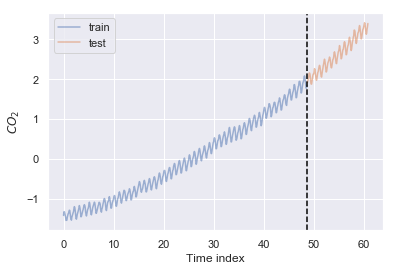

In [25]:
import seaborn as sns
sns.set()

X_train_range = X_train['year'] - X_train['year'].min()
X_test_range = X_test['year'] - X_train['year'].min()

plt.plot(X_train_range, y_train, label='train', alpha=0.5)
plt.plot(X_test_range, y_test, label='test', alpha=0.5)
plt.axvline(X_train['year'].iloc[-1] - X_train['year'].min(), c='black', linestyle='--')
plt.xlabel('Time index')
plt.ylabel('$CO_2$')
plt.legend(loc='best')
plt.show()

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [26]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


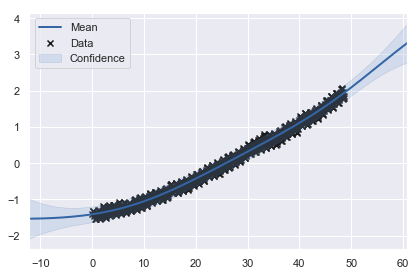

In [49]:
### BEGIN Solution
rbf = RBF(1)
gpreg = GPRegression(X_train_range.values.reshape(-1, 1), y_train.reshape(-1, 1), rbf)
gpreg.optimize()
y_pred = gpreg.predict(X_test_range.values.reshape(-1, 1))[0].ravel()
gpreg.plot()
plt.show()
### END Solution

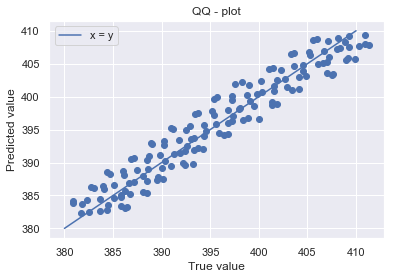

In [50]:
plt.scatter(sc.inverse_transform(y_test), sc.inverse_transform(y_pred))
plt.plot(np.arange(380, 411), np.arange(380, 411), label='x = y')
plt.title('QQ - plot')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend(loc='best')
plt.show()

In [51]:
r2_score(y_test, y_pred)

0.9254219797111332